In [ ]:
# example from https://scipy.github.io/old-wiki/pages/Cookbook/RadialBasisFunctions.html

Using radial basis functions for smoothing/interpolation

Radial basis functions can be used for smoothing/interpolating scattered data in n-dimensions, but should be used with caution for extrapolation outside of the observed data range.

1d example

This example compares the usage of the Rbf and UnivariateSpline classes from the scipy.interpolate module.

In [ ]:
import numpy as np
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline # added to show plot output in the notebook - dave
# setup data
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

# use fitpack2 method
ius = InterpolatedUnivariateSpline(x, y)
yi = ius(xi)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')

# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.savefig('rbf1d.png')

2d example

This example shows how to interpolate scattered 2d data

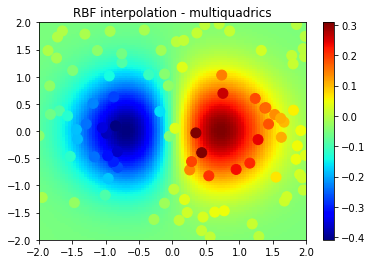

In [4]:
#clear kernal prior to this run
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
# added to show plot output in the notebook - dave

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
#n = plt.normalize(-2., 2.)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.savefig('rbf2d.png')